In [135]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from kneed import KneeLocator
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as sch
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [136]:
df = pd.read_csv("data.csv",delimiter=";")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [138]:
missing_values = df.isnull().any()
print(missing_values)

Marital status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance\t                      False
Previous qualification                            False
Previous qualification (grade)                    False
Nacionality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Admission grade                                   False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                           False
Gender                                          

In [139]:
duplicate_rows = df[df.duplicated()]

In [140]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [141]:
label_encoder = LabelEncoder()
df_encode = df.copy()
df_encode['Target'] = label_encoder.fit_transform(df_encode['Target'])
df_encode.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [142]:
numerical_columns = df_encode.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()

df_scaled = df_encode.copy() 
df_scaled[numerical_columns] = scaler.fit_transform(df_scaled[numerical_columns])
df_scaled.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,-0.294829,-0.095470,2.490896,-4.209520,0.350082,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,...,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,0
1,-0.294829,-0.209869,-0.554068,0.192580,0.350082,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,...,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199,2
2,-0.294829,-1.010660,2.490896,0.103404,0.350082,-0.35023,-0.804841,-0.126298,1.117723,0.959802,...,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,0
3,-0.294829,-0.095470,0.207173,0.444115,0.350082,-0.35023,-0.804841,-0.126298,1.181819,0.959802,...,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511,2
4,1.356212,1.162916,-0.554068,-0.408389,-2.856470,-0.35023,-2.473171,-0.126298,1.117723,1.024985,...,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199,2


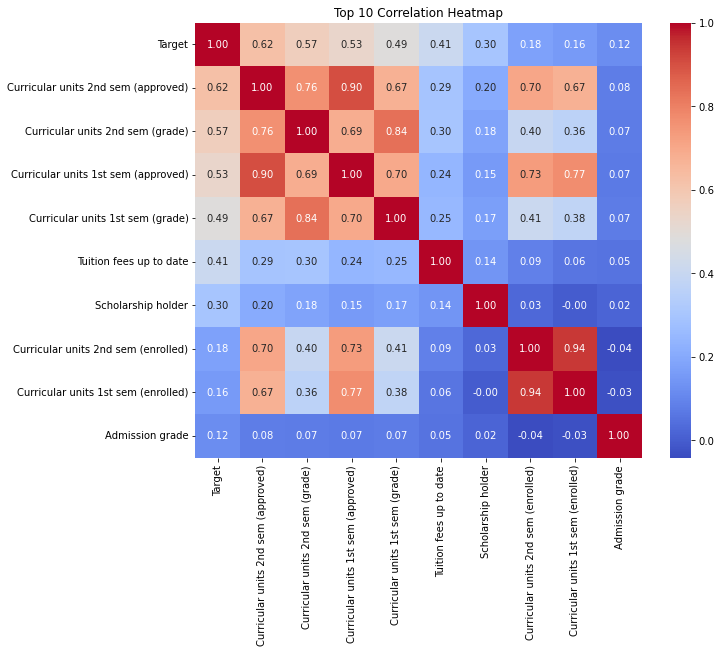

In [143]:
top_corr_columns =  df_scaled.corr().nlargest(10, 'Target')['Target'].index
top_corr_matrix = df_scaled[top_corr_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Top 10 Correlation Heatmap')
plt.show()

C:\Users\patri\AppData\Local\Temp\ipykernel_24284\2179791397.py:2: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
C:\Users\patri\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


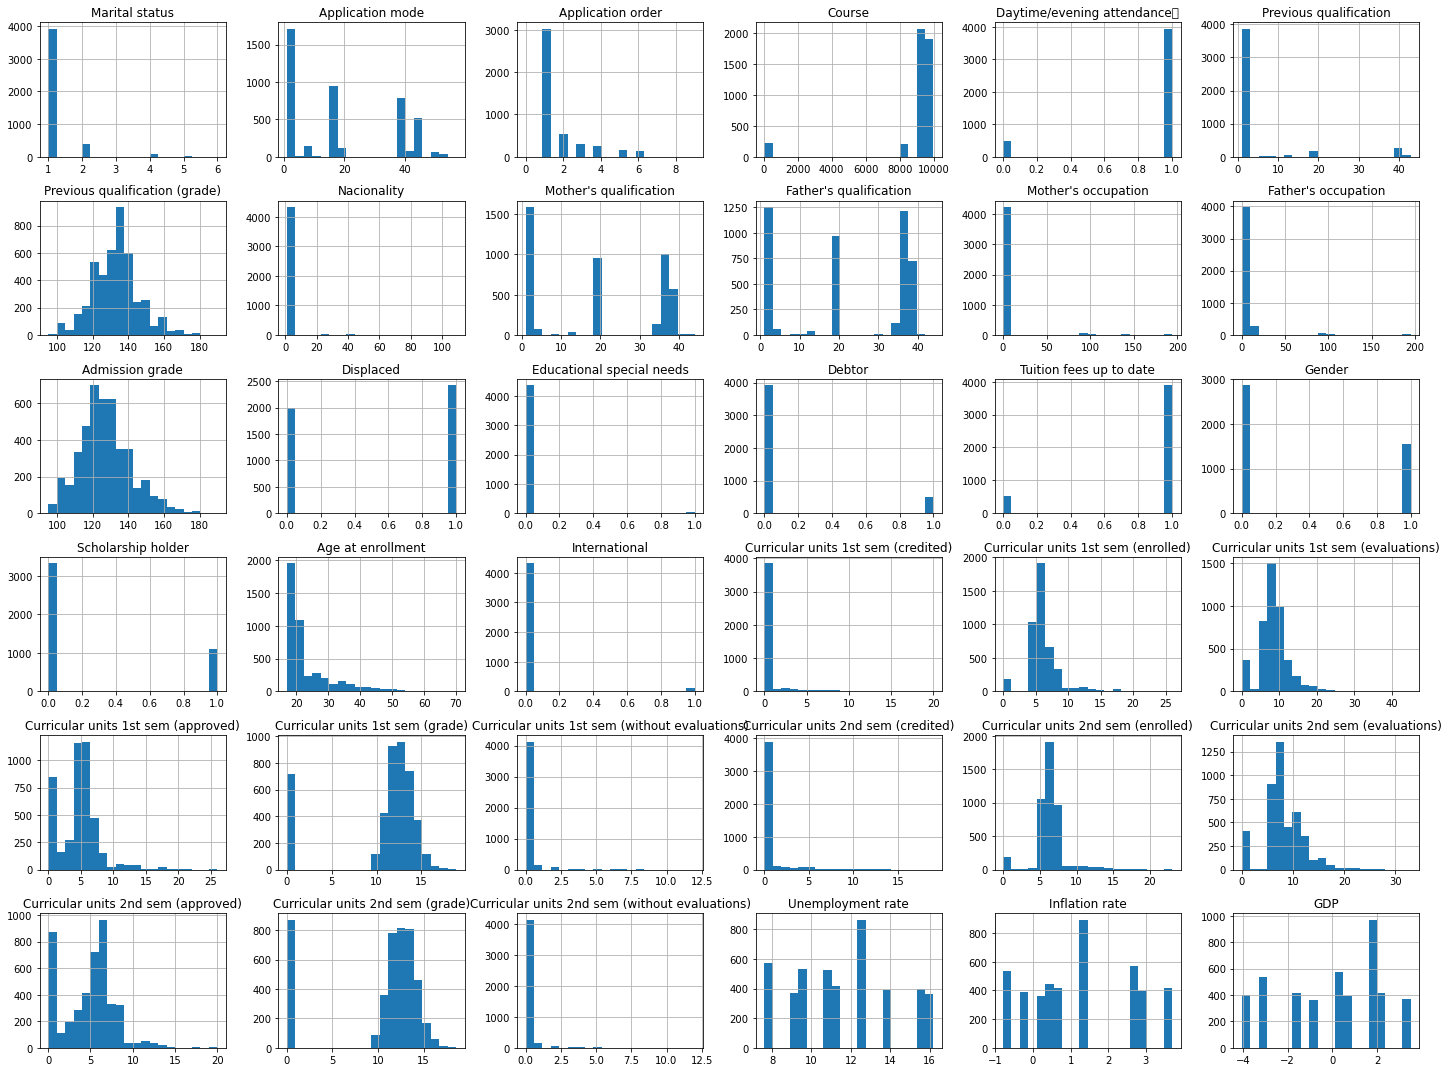

In [144]:
df.hist(bins=20, figsize=(20,15))
plt.tight_layout()
plt.show()

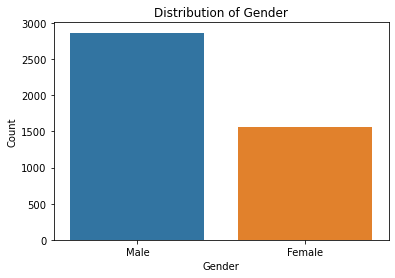

In [145]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

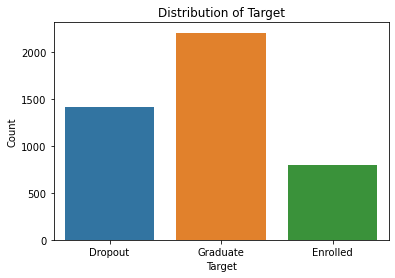

In [146]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=df)
plt.title('Distribution of Target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

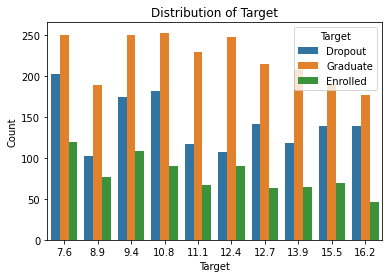

In [147]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Unemployment rate', hue='Target', data=df)
plt.title('Distribution of Target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

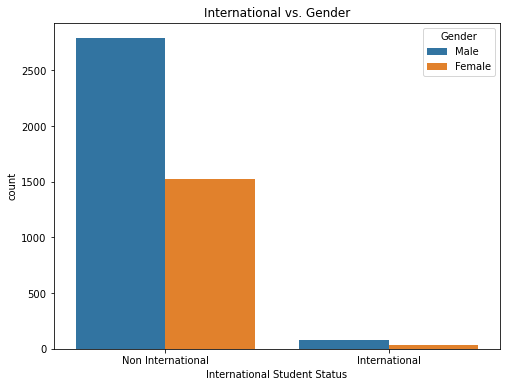

In [148]:
plt.figure(figsize=(8, 6))
sns.countplot(x='International', hue='Gender', data=df)
plt.title('International vs. Gender')
plt.xlabel('International Student Status')
plt.xticks(ticks=[0, 1], labels=['Non International', 'International'])
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

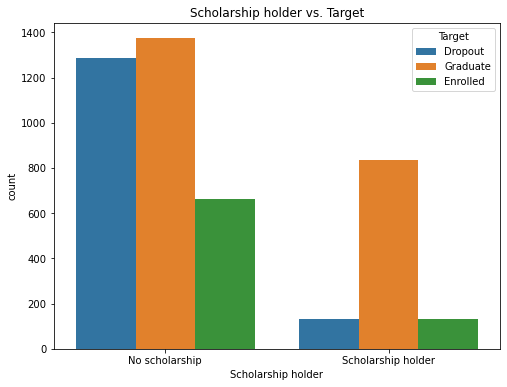

In [149]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Scholarship holder', hue='Target', data=df)
plt.title('Scholarship holder vs. Target')
plt.xticks(ticks=[0, 1], labels=['No scholarship', 'Scholarship holder'])
plt.show()

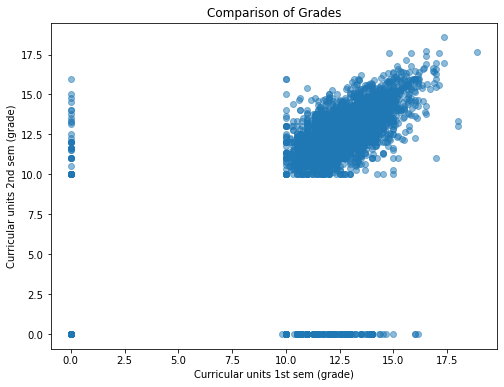

In [150]:
plt.figure(figsize=(8, 6))
plt.scatter(x=df['Curricular units 1st sem (grade)'], y=df['Curricular units 2nd sem (grade)'],
            alpha=0.5)
plt.xlabel('Curricular units 1st sem (grade)')
plt.ylabel('Curricular units 2nd sem (grade)')
plt.title('Comparison of Grades')
plt.show()

In [151]:
print(df['Target'].unique())
print(df['Target'].dtype)

['Dropout' 'Graduate' 'Enrolled']
object


# Clustering

In [152]:
df_cluster = df_scaled.drop(['Target'],axis=1)
df_cluster = df_scaled.copy()

In [153]:
numeric_columns = df_cluster.select_dtypes(include=['float64']).columns
df_numeric = df_cluster[numeric_columns]

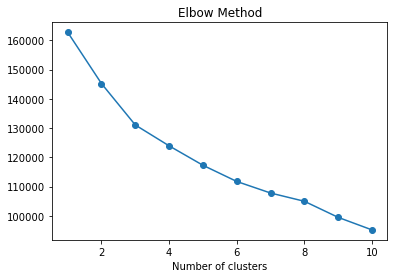

The best cluster is: 3


In [154]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10,random_state=42)
    kmeans.fit(df_cluster)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.show()

findknee = KneeLocator(list(range(1, 11)),
                       sse,
                       curve="convex",
                       direction="decreasing")

print('The best cluster is:', findknee.elbow)

In [155]:
best_kmeans = KMeans(n_clusters=findknee.elbow,n_init=10,random_state=42)
best_kmeans.fit(df_cluster)
df['Kmeans Cluster'] = best_kmeans.labels_

In [156]:
aggregation_dict = {
    'Marital status': 'mean',  
    'Application mode': 'mean',  
    'Previous qualification': 'mean', 
    'Admission grade': 'mean',
    'Tuition fees up to date': lambda x: x.mode().iloc[0],
    'Scholarship holder': lambda x: x.mode().iloc[0],
    'Age at enrollment': 'mean', 
    'Curricular units 1st sem (approved)': 'mean',
    'Curricular units 1st sem (grade)': 'mean', 
    'Curricular units 2nd sem (approved)': 'mean',
    'Curricular units 2nd sem (grade)': 'mean', 
    'GDP': 'mean', 
    'Target': lambda x: x.mode().iloc[0]  
}
cluster_summary = df.groupby('Kmeans Cluster').agg(aggregation_dict)
cluster_summary.head()

,Marital status,Application mode,Previous qualification,Admission grade,Tuition fees up to date,Scholarship holder,Age at enrollment,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),GDP,Target
Kmeans Cluster,,,,,,,,,,,,,
0,1.143604,16.237085,4.080873,126.939852,1,0,21.996310,5.277675,12.741707,5.147909,12.616993,0.068595,Graduate
1,1.267116,23.000000,4.800224,126.402245,1,0,26.172840,0.455668,2.344969,0.114478,0.755743,-0.246644,Dropout
2,1.302491,33.081851,9.622776,129.246975,1,0,28.729537,11.576512,12.632019,9.896797,12.649831,0.019217,Graduate


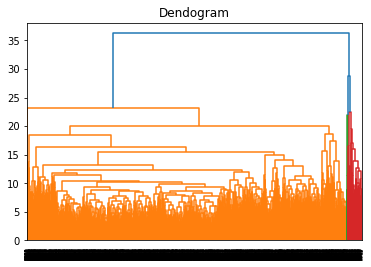

In [157]:
dist_matrix = sch.linkage(df_scaled, method='complete')
dn = sch.dendrogram(dist_matrix)
plt.title('Dendogram')
plt.show()

In [158]:
hc = AgglomerativeClustering(n_clusters = findknee.elbow, affinity='euclidean', linkage='complete')
y_hc = hc.fit_predict(df_scaled)

In [159]:
df["Hierarchical Cluster"] = y_hc

aggregation_dict = {
    'Marital status': 'mean',  
    'Application mode': 'mean',  
    'Previous qualification': 'mean', 
    'Admission grade': 'mean',
    'Tuition fees up to date': lambda x: x.mode().iloc[0],
    'Scholarship holder': lambda x: x.mode().iloc[0],
    'Age at enrollment': 'mean', 
    'Curricular units 1st sem (approved)': 'mean',
    'Curricular units 1st sem (grade)': 'mean', 
    'Curricular units 2nd sem (approved)': 'mean',
    'Curricular units 2nd sem (grade)': 'mean', 
    'GDP': 'mean', 
    'Target': lambda x: x.mode().iloc[0]  
}
cluster_summary = df.groupby('Hierarchical Cluster').agg(aggregation_dict)
cluster_summary

,Marital status,Application mode,Previous qualification,Admission grade,Tuition fees up to date,Scholarship holder,Age at enrollment,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),GDP,Target
Hierarchical Cluster,,,,,,,,,,,,,
0,1.171239,18.253311,4.511589,126.892502,1,0,23.005676,4.401135,10.626910,4.192053,10.191641,0.033482,Graduate
1,1.348066,27.823204,5.740331,128.890608,1,0,29.033149,11.922652,11.483333,10.254144,11.688841,-0.597459,Graduate
2,1.200000,25.400000,9.200000,128.033333,1,0,26.800000,3.733333,4.395778,2.933333,3.499563,-1.647333,Dropout


# Classification

In [160]:
X = df_scaled.drop(['Target'], axis=1)  # Features
y = df_scaled['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [161]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print Results
print("Random Forest Model Results:")
print("Confusion Matrix:")
print(conf_matrix_rf)
print(f"Accuracy: {accuracy_rf:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Display a sample of actual and predicted labels
actual_labels_rf = label_encoder.inverse_transform(y_test)  # Assuming you have a label_encoder
predicted_labels_rf = label_encoder.inverse_transform(y_pred_rf)

comparison_df_rf = pd.DataFrame({'Actual': actual_labels_rf, 'Predicted': predicted_labels_rf})
print("Sample Comparison:")
comparison_df_rf.sample(n=10)

Random Forest Model Results:
Confusion Matrix:
[[294  26  54]
 [ 57  60  80]
 [ 17  26 492]]
Accuracy: 0.7649
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       374
           1       0.54      0.30      0.39       197
           2       0.79      0.92      0.85       535

    accuracy                           0.76      1106
   macro avg       0.71      0.67      0.68      1106
weighted avg       0.75      0.76      0.75      1106

Sample Comparison:


,Actual,Predicted
418,Graduate,Graduate
871,Dropout,Dropout
320,Graduate,Graduate
495,Graduate,Graduate
61,Graduate,Graduate
404,Graduate,Graduate
867,Dropout,Dropout
18,Enrolled,Dropout
1091,Graduate,Graduate
1076,Graduate,Graduate


In [162]:
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)

log_reg_accuracy = accuracy_score(y_test, logistic_pred)
conf_matrix = confusion_matrix(y_test, logistic_pred)
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {log_reg_accuracy:.4f}")

actual_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(logistic_pred)

comparison_df = pd.DataFrame({'Actual': actual_labels, 'Predicted': predicted_labels})
comparison_df.sample(n=10)

Confusion Matrix:
[[289  34  51]
 [ 53  57  87]
 [ 15  31 489]]
Accuracy: 0.7550


,Actual,Predicted
714,Graduate,Graduate
133,Enrolled,Dropout
979,Enrolled,Graduate
658,Dropout,Dropout
417,Graduate,Graduate
750,Dropout,Graduate
59,Graduate,Graduate
958,Graduate,Enrolled
76,Graduate,Graduate
936,Graduate,Graduate


In [163]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

tree_accuracy = accuracy_score(y_test, tree_pred)
conf_matrix = confusion_matrix(y_test, tree_pred)
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {tree_accuracy:.4f}")

actual_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(tree_pred)

comparison_df = pd.DataFrame({'Actual': actual_labels, 'Predicted': predicted_labels})
comparison_df.sample(n=10) 

Confusion Matrix:
[[254  70  50]
 [ 60  71  66]
 [ 34  72 429]]
Accuracy: 0.6817


,Actual,Predicted
1029,Graduate,Graduate
660,Graduate,Enrolled
84,Graduate,Graduate
1,Graduate,Graduate
175,Graduate,Graduate
971,Enrolled,Enrolled
85,Enrolled,Enrolled
158,Dropout,Dropout
978,Enrolled,Dropout
157,Graduate,Graduate


In [164]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print Results
print("XGBoost Model Results:")
print("Confusion Matrix:")
print(conf_matrix_xgb)
print(f"Accuracy: {accuracy_xgb:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Display a sample of actual and predicted labels
actual_labels_xgb = label_encoder.inverse_transform(y_test)  # Assuming you have a label_encoder
predicted_labels_xgb = label_encoder.inverse_transform(y_pred_xgb)

comparison_df_xgb = pd.DataFrame({'Actual': actual_labels_xgb, 'Predicted': predicted_labels_xgb})
print("Sample Comparison:")
print(comparison_df_xgb.sample(n=10))

XGBoost Model Results:
Confusion Matrix:
[[283  45  46]
 [ 45  81  71]
 [ 22  35 478]]
Accuracy: 0.7613
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       374
           1       0.50      0.41      0.45       197
           2       0.80      0.89      0.85       535

    accuracy                           0.76      1106
   macro avg       0.71      0.69      0.69      1106
weighted avg       0.75      0.76      0.75      1106

Sample Comparison:
        Actual Predicted
1011  Enrolled  Graduate
847   Graduate  Graduate
83     Dropout   Dropout
106   Graduate  Graduate
1093  Graduate  Graduate
270   Enrolled   Dropout
79    Graduate  Graduate
233   Enrolled   Dropout
271   Enrolled  Graduate
33     Dropout   Dropout


In [165]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Print Results
print("K-Nearest Neighbors (KNN) Model Results:")
print("Confusion Matrix:")
print(conf_matrix_knn)
print(f"Accuracy: {accuracy_knn:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Display a sample of actual and predicted labels
actual_labels_knn = label_encoder.inverse_transform(y_test)  # Assuming you have a label_encoder
predicted_labels_knn = label_encoder.inverse_transform(y_pred_knn)

comparison_df_knn = pd.DataFrame({'Actual': actual_labels_knn, 'Predicted': predicted_labels_knn})
print("Sample Comparison:")
print(comparison_df_knn.sample(n=10))

K-Nearest Neighbors (KNN) Model Results:
Confusion Matrix:
[[256  40  78]
 [ 45  55  97]
 [ 26  49 460]]
Accuracy: 0.6971
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       374
           1       0.38      0.28      0.32       197
           2       0.72      0.86      0.79       535

    accuracy                           0.70      1106
   macro avg       0.63      0.61      0.61      1106
weighted avg       0.68      0.70      0.68      1106

Sample Comparison:
        Actual Predicted
926   Graduate  Graduate
800    Dropout   Dropout
641    Dropout   Dropout
465   Graduate  Enrolled
815   Graduate  Graduate
136    Dropout   Dropout
226   Graduate  Graduate
231    Dropout   Dropout
462   Graduate  Graduate
1028   Dropout  Enrolled


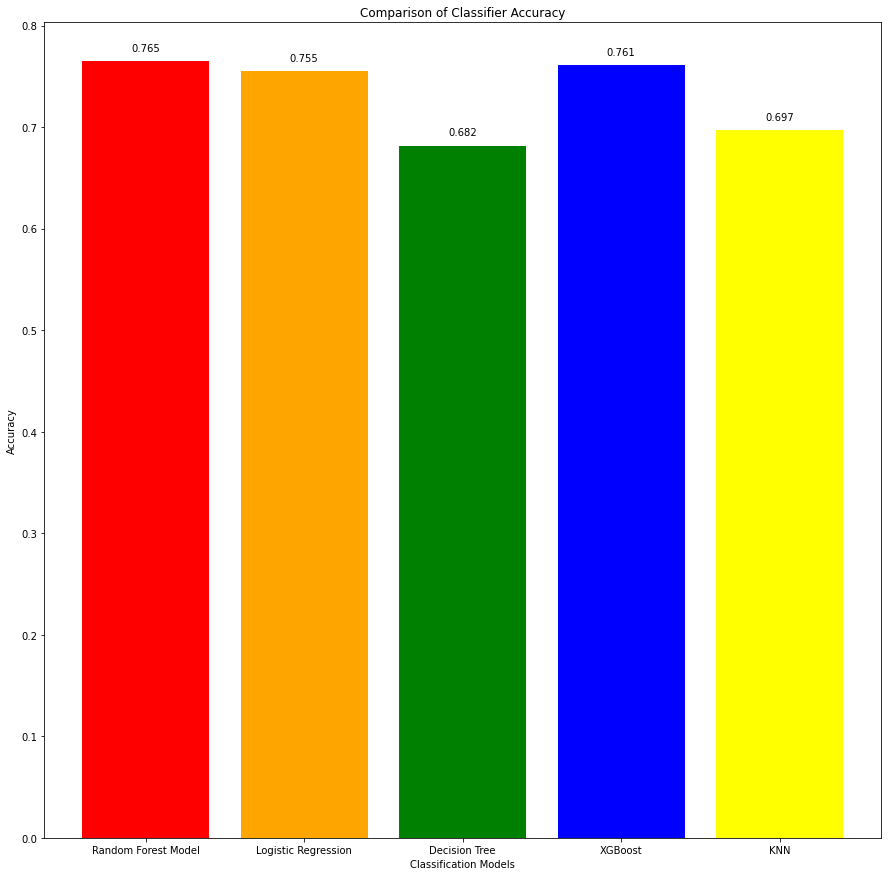

In [166]:
accuracies = [accuracy_rf, log_reg_accuracy, tree_accuracy, accuracy_xgb, accuracy_knn]
models = ['Random Forest Model','Logistic Regression', 'Decision Tree', 'XGBoost', 'KNN']

plt.figure(figsize=(15, 15))
plt.bar(models, accuracies, color=['red', 'orange', 'green','blue', 'yellow'])
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.3f}', ha='center', color='black', fontsize=10)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracy')
plt.show()